In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from rotate_halo import Halo

Load some particle data

In [2]:
particle_df = pd.read_csv('halo_440407.csv')

Put coordinates, velocities and masses into a numpy array
and check the shape, which has to be 3 x N

In [12]:
coords = particle_df[['x', 'y', 'z']].to_numpy().T
vels = particle_df[['v_x', 'v_y', 'v_z']].to_numpy().T
masses = particle_df.Masses.values
print(coords.shape, vels.shape)

(3, 1574788) (3, 1574788)


For our example case, the systemic velocity and central coordinates are known:

In [5]:
system_vel = np.array([-55.80021286, -138.62696838, 148.7311554])
system_coords = np.array([13345.8046875, 30567.46679688, 21422.43359375])

But we can also let the software calculate them for us.

First we create a Halo object:

In [6]:
myhalo = Halo(coords, vels, masses)

Now we can calculate the face on coordinates and velocities.

In [7]:
face_on_coords, face_on_vels = myhalo.rotate_faceon()

No central coordinates given. Calculated center of mass coordinates to:
13346.828540413013 30568.298546292375 21422.52568013272
No systemic velocity given.
Calculated systemic velocities to:
-55.107468624174146 -147.00533905679637 159.46844632481537


The calculated systemic values can now be accessed like this:

In [11]:
print(*myhalo.center_coordinates)
print(*myhalo.center_velocities)

13346.828540413013 30568.298546292375 21422.52568013272
-55.107468624174146 -147.00533905679637 159.46844632481537


The calculated values are pretty close to what we were given.
Still, we want to use our values instead. So let's make a new object
and pass our systemic coordinates and velocities as values.

In [14]:
myhalo = Halo(coords, vels, masses, system_coords, system_vel)

now we calculate the faceon projection again.

In [ ]:
myhalo.rotate_faceon()

For visualisation purposes, we also extract the shifted coordinates

In [19]:
coords_shifted = myhalo.coordinates_shifted

Now we can plot the original and rotated particles

(-40.0, 40.0)

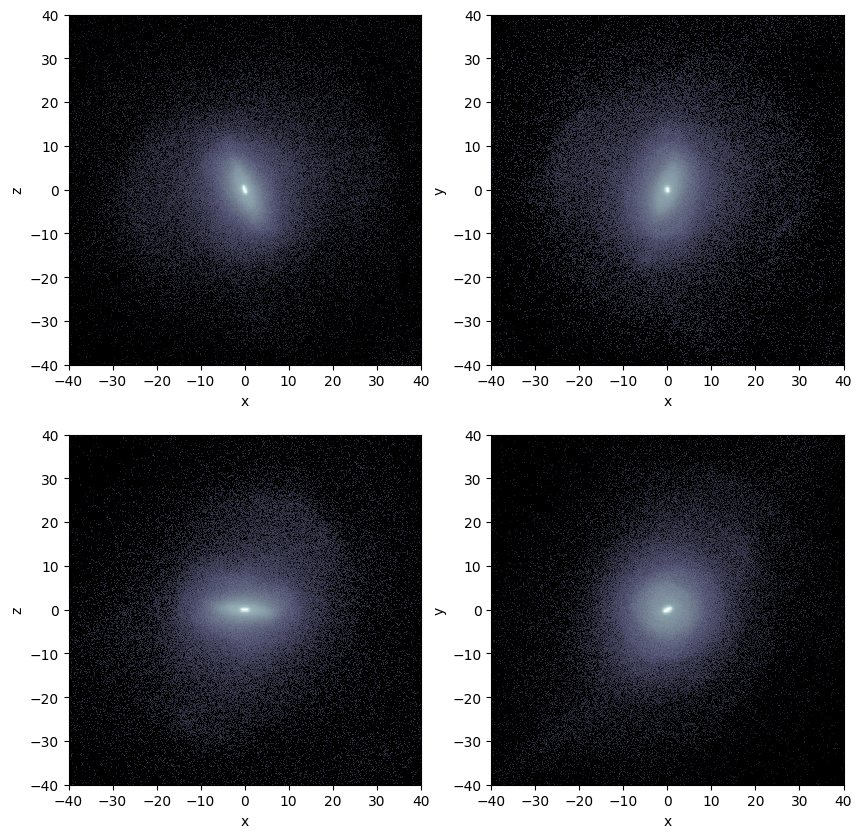

In [20]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

my_cmap = plt.cm.bone
my_cmap.set_bad('black', alpha=None)

minMax =[-70,70]

ax1.hist2d(coords_shifted[0], coords_shifted[2], bins=1000,
           range=[[minMax[0],minMax[1]],[minMax[0],minMax[1]]],
           weights=particle_df.Masses, norm=mc.LogNorm(), cmap=my_cmap)

ax1.set_xlabel('x')
ax1.set_ylabel('z')

ax2.hist2d(coords_shifted[0], coords_shifted[1], bins=1000,
           range=[[minMax[0],minMax[1]],[minMax[0],minMax[1]]],
           weights=particle_df.Masses, norm=mc.LogNorm(), cmap=my_cmap)

ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax3.hist2d(face_on_coords[0], face_on_coords[2], bins=1000,
           range=[[minMax[0],minMax[1]],[minMax[0],minMax[1]]],
           weights=particle_df.Masses, norm=mc.LogNorm(), cmap=my_cmap)

ax3.set_xlabel('x')
ax3.set_ylabel('z')

ax4.hist2d(face_on_coords[0], face_on_coords[1], bins=1000,
           range=[[minMax[0],minMax[1]],[minMax[0],minMax[1]]],
           weights=particle_df.Masses, norm=mc.LogNorm(), cmap=my_cmap)

ax4.set_xlabel('x')
ax4.set_ylabel('y')

ax1.set_xlim(-40,40)
ax1.set_ylim(-40,40)
ax2.set_xlim(-40,40)
ax2.set_ylim(-40,40)
ax3.set_xlim(-40,40)
ax3.set_ylim(-40,40)
ax4.set_xlim(-40,40)
ax4.set_ylim(-40,40)

Now that the face-on coordinates are found we can easily rotate the halo to other inclinations.

In [21]:
coords_90, vels_90 = myhalo.rotate_angle(90), myhalo.rotate_angle(90, 'x', face_on_vels)

In [ ]:
myhalo.find_center_of_mass()

(-40.0, 40.0)

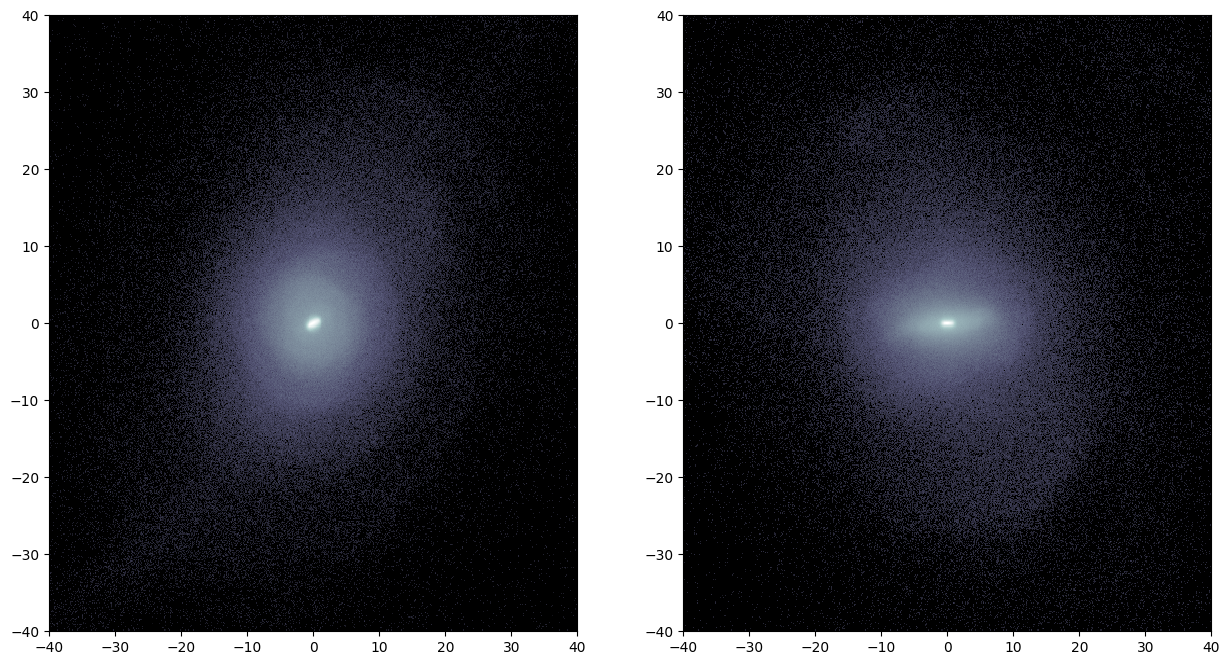

In [22]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#my_cmap = plt.cm.Greys
#my_cmap.set_under('black', alpha=None)
my_cmap = plt.cm.bone
my_cmap.set_bad('black', alpha=None)

minMax =[-70,70]
counts, bins, _, _ = ax1.hist2d(coords_90[0], coords_90[2], bins=1000, range=[[minMax[0],minMax[1]],[minMax[0],minMax[1]]], weights=particle_df.Masses, norm=mc.LogNorm(), cmap=my_cmap)
ax2.hist2d(coords_90[0], coords_90[1], bins=1000, range=[[minMax[0],minMax[1]],[minMax[0],minMax[1]]], weights=particle_df.Masses, norm=mc.LogNorm(), cmap=my_cmap)

ax1.set_xlim(-40,40)
ax1.set_ylim(-40,40)
ax2.set_xlim(-40,40)
ax2.set_ylim(-40,40)